**Step 1 - WebScraping 3 Websites**

City: *Marrakech, Morocco*

Dates: *01-10-2022 - 08-10-2022*

In [52]:
# Import necessary Libraries
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import time
from operator import itemgetter
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [53]:
# Initialization of storage arrays for gloval data
NAMES = []
LINKS = []
DISTANCES = []
PRICES = []
PRICES_PER_NIGHT = []
REVIEW_SCORES = []
HOTEL_RATINGS = []
PICTURES = []
SUMMARIES = []
ADDRESSES = []

Website 1: Booking.com

In [54]:
# Initialization of storage arrays for target data
names = []
links = []
distances = []
prices = []
review_scores = []
hotel_ratings = []
pictures = []
summaries = []
addresses = []

headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}
url = 'https://www.booking.com/searchresults.en-gb.html?label=gen173nr-1FCAEoggI46AdIM1gEaEiIAQGYAQ24ARfIAQzYAQHoAQH4AQuIAgGoAgO4ApyhsZkGwAIB0gIkODRjYzM3NTgtNzk4MC00ZDRkLWJiYmQtNmJkMGJlZDg2Njk42AIG4AIB&sid=25333463d16c11d25c2a7e9f14bc6616&aid=304142&ss=Marrakech%2C+Marrakech-Safi%2C+Morocco&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-38833&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=0cab559291f80137&ac_meta=GhAwY2FiNTU5MjkxZjgwMTM3IAAoATICZW46BW1hcnJhQABKAFAA&checkin=2022-10-01&checkout=2022-10-08&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure&offset='
offset = 0 

for page in range(1,11):
  source = requests.get(url + str(offset),headers=headers)
  offset += 25
  soup=BeautifulSoup(source.content,'lxml')

  for Post in soup.find_all('div', class_= 'a826ba81c4 fe821aea6c fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942'):
    link = Post.a['href']
    links.append(link)
    source = requests.get(link).text
    soup_ = BeautifulSoup(source, 'lxml')
    div_req = soup_.find('div', class_ = 'clearfix bh-photo-grid bh-photo-grid--space-down fix-score-hover-opacity')
    pics = []
    try:
      for pic in div_req.find_all('img', class_ = "hide"):
        pics.append(pic['src'])
    except:
      pics.append(None)
    pictures.append(pics)
    
    try:
      summaries.append(soup_.find('div', attrs={'id':"property_description_content"} ).text)
    except:
      summaries.append(None)

    try:  
      addresses.append(soup_.find('span', class_ = ' hp_address_subtitle js-hp_address_subtitle jq_tooltip ').text)
    except:
      addresses.append(None)

  for Post in soup.find_all('div', class_= 'fcab3ed991 a23c043802'):
    names.append(Post.text)

  for Post in soup.find_all('span', class_= 'fcab3ed991 bd73d13072'):
    try:
      price = Post.text.replace('S$\xa0', '')
      prices.append(price.replace(',', ''))
    except:
      price = None
      prices.append(price)

  for Post in soup.find_all('span', class_ = 'f4bd0794db'):
    try:
      distances.append(Post.span.text.split()[0])
    except:
      print(' ')

  for Post in soup.find_all('div', class_= 'a1b3f50dcd b2fe1a41c3 a7c67ebfe5 d19ba76520 d14b211b4f'):
    rs = None
    hr = None
    if(Post.find('span', class_ = 'e2f34d59b1')):
      review_scores.append(rs)
      hotel_ratings.append(hr)
    else:
      try:
        review_scores.append(Post.find('div', class_ = 'd8eab2cf7f c90c0a70d3 db63693c62').text.split()[0])
      except:
        review_scores.append(rs)
      try:
        hotel_ratings.append(Post.find('div', class_ = 'b5cd09854e d10a6220b4').text)
      except: 
        hotel_ratings.append(hr)

In [55]:
# Get average price for a duration of 7 nights
prices_per_night = []
for p in prices:
  price = p.replace('S$\xa0', '')
  price = p.replace('US$','')
  if(',' in price):
    price = price.replace(',', '')
  prices_per_night.append(round(float(price)/7))
  

In [56]:
# Remove , from review_scores
for rs in range(len(review_scores)):
  if(',' in str(review_scores[rs]) and str(review_scores[rs]) != 'None'):
    review_scores[rs] = review_scores[rs].replace(',', '')

In [57]:
# Remove currency from prices
for p in range(len(prices)):
  if(prices[p] != None):
    prices[p] = prices[p].replace('€\xa0','')
    prices[p] = prices[p].replace('US$','')
    if(',', prices[p]):
      prices[p] = prices[p].replace(',','')

In [58]:
print(len(names))
print(len(links))
print(len(distances))
print(len(prices))
print(len(prices_per_night))
print(len(review_scores))
print(len(hotel_ratings))
print(len(summaries))
print(len(addresses))
print(len(pictures))

250
250
250
250
250
250
250
250
250
250


In [59]:
# Add to global arrays
NAMES += names[:225]
LINKS += links[:225]
DISTANCES += distances[:225]
PRICES += prices[:225]
PRICES_PER_NIGHT += prices_per_night[:225]
REVIEW_SCORES += review_scores[:225]
HOTEL_RATINGS += hotel_ratings[:225]
PICTURES += pictures[:225]
SUMMARIES += summaries[:225]
ADDRESSES += addresses[:225]

In [60]:
# Build a CSV file to store data
csv_file = open('Hotels1.csv', 'w')

In [62]:
df = pd.DataFrame({"Name" : names[:225], "Distance (Km/m)" : distances[:225], "Price ($)": prices[:225],  "Review Score": review_scores[:225], "Hotel Rating": hotel_ratings[:225], "Price-Per-Night ($)": prices_per_night[:225], "Link": links[:225], "Summary": summaries[:225], "Address": addresses[:225], "Pictures": pictures[:225]})
df.to_csv("Hotels1.csv", index=False)

In [63]:
pd.read_csv('Hotels1.csv')

,Name,Distance (Km/m),Price ($),Review Score,Hotel Rating,Price-Per-Night ($),Link,Summary,Address,Pictures
0,Terra Mia Marrakech,8.1,397,126.0,8.1,57,https://www.booking.com/hotel/ma/terra-mia-mar...,\n\nYou're eligible for a Genius discount at T...,"\nKm 12 Route De Fès, 40000 Marrakech, Morocco\n",['https://cf.bstatic.com/xdata/images/hotel/ma...
1,El Olivar Palace Marrakech-All Inclusive,7.6,951,885.0,8.6,136,https://www.booking.com/hotel/ma/el-olivar-pal...,"\nSet in Marrakech, 7.5 miles from Koutoubia M...","\n10 Km , Route de l'ourika, 40000 Marrakech, ...",['https://cf.bstatic.com/xdata/images/hotel/ma...
2,Jaal Riad Resort - Adults Only,2.4,1279,343.0,8.9,183,https://www.booking.com/hotel/ma/les-jardins-d...,\n\nYou're eligible for a Genius discount at J...,\nAvenue Mohammed VI zone touristique de l'...,['https://cf.bstatic.com/xdata/images/hotel/ma...
3,berber house,27.7,231,NaN,NaN,33,https://www.booking.com/hotel/ma/berber-house-...,"\nOffering a terrace and garden view, berber h...","\natlas mountaine, 42152 Marrakech, Morocco\n",[None]
4,Dar Salam Palm - All Inclusive,0.6,624,884.0,8.9,89,https://www.booking.com/hotel/ma/dar-salam.en-...,\n\nYou're eligible for a Genius discount at D...,"\nBab Doukkala, Rue El Gza, Arst Iheri Derb Be...",['https://cf.bstatic.com/xdata/images/hotel/ma...
...,...,...,...,...,...,...,...,...,...,...
220,Riad Anaïs Marrakech,0.7,825,93.0,9.4,118,https://www.booking.com/hotel/ma/riad-anaa-s.e...,\n\nYou're eligible for a Genius discount at R...,"\n18 Derb El Hammam Riad Laarousse, Medina, 40...",['https://cf.bstatic.com/xdata/images/hotel/ma...
221,PALAIS DIDIER SIX,1.5,1039,10.0,9.7,148,https://www.booking.com/hotel/ma/palais-didier...,\n\nYou're eligible for a Genius discount at P...,"\nRue de Bab Aylan, Medina, 40000 Marrakech, M...",['https://cf.bstatic.com/xdata/images/hotel/ma...
222,Be Live Experience Marrakech Palmeraie - All I...,4.6,1254,908.0,8.1,179,https://www.booking.com/hotel/ma/be-live-exper...,\n\nYou're eligible for a Genius discount at B...,"\nLot B6, Zone de Zahrat Annakhil, 40000 Marra...",['https://cf.bstatic.com/xdata/images/hotel/ma...
223,Riad Dar Nadwa,0.9,1039,NaN,NaN,148,https://www.booking.com/hotel/ma/riad-dar-nadw...,\n\nYou're eligible for a Genius discount at R...,"\nDiour Jdad N° 52, Zaouia El Abbassia. Bab Ta...",['https://cf.bstatic.com/xdata/images/hotel/ma...


Website 2: Openoair.com

In [65]:
# Initialization of storage arrays for target data
names = []
links = []
distances = []
prices = []
review_scores = []
hotel_ratings = []
pictures = []
summaries = []
addresses = []


In [66]:
import time
import requests

offset = 0
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}

for page in range (1,4):
  url = 'https://book.cheapoair.com/searchresults.en-us.html?label=desktop-1461715-click-h-coa-google-global&aid=1461715&ss=Marrakech&checkin_month=10&checkin_monthday=1&checkin_year=2022&checkout_month=10&checkout_monthday=8&checkout_year=2022&group_adults=2&group_children=0&no_rooms=1&offset=' + str(offset)
  offset +=25
  response= requests.get(url,headers=headers).text


  soup=BeautifulSoup(response,'lxml')


  for Post in soup.find_all('div', class_= 'd20f4628d0'):
    name = Post.find('div', class_ = 'fcab3ed991 a23c043802').get_text()
    names.append(name)

    distance = Post.find('span',{'data-testid': 'distance'}).text.split()[0]
    distances.append(distance)

    price = Post.find('span', class_ = 'fcab3ed991 bd73d13072').get_text().replace('€\xa0','')
    prices.append(price)
  
    rating = 0
    for rate in Post.find_all('span', class_ = 'b6dc9a9e69 adc357e4f1 fe621d6382'):
      rating += 1 
    hotel_ratings.append(rating)

    try:
      rs = Post.find('div', class_ = 'b5cd09854e d10a6220b4').get_text()
      review_scores.append(rs)
    except:
      rs = None
      review_scores.append(rs)

    link = Post.find('a', class_ = 'e13098a59f')['href']
    links.append(link)

    secondary_response=requests.get(link).text
    secondary_soup=BeautifulSoup(secondary_response,'lxml')
    pics_link = []
    summary = []

    div_req = secondary_soup.find('div', class_ = 'clearfix bh-photo-grid bh-photo-grid--space-down fix-score-hover-opacity')

    try:
      for pic_link in div_req.find_all('img', class_ = "hide"):
        pics_link.append(pic_link['src'])
    except:
      pics_link.append(None)
    
    pictures.append(pics_link)

    div_summary = secondary_soup.find('div', {"id": "property_description_content"})
    for sum in div_summary.find_all('p'):
      summary.append(sum.text)
    total_summary = '\n'.join(summary)
    summaries.append(total_summary)

    address = secondary_soup.find('span', class_ = ' hp_address_subtitle js-hp_address_subtitle jq_tooltip ').get_text()
    addresses.append(address)


In [67]:
# Get average price for a duration of 7 nights
prices_per_night = []
for p in prices:
  price = p.replace('€\xa0', '')
  price = p.replace('US$','')
  if(',' in price):
    price = price.replace(',', '')
  prices_per_night.append(round(float(price)/7))
  

In [68]:
# Remove , from review_scores
for rs in range(len(review_scores)):
  if(',' in str(review_scores[rs]) and str(review_scores[rs]) != 'None'):
    review_scores[rs] = review_scores[rs].replace(',', '')

In [69]:
# Remove currency from prices
for p in range(len(prices)):
  if(prices[p] != None):
    prices[p] = prices[p].replace('€\xa0','')
    prices[p] = prices[p].replace('US$','')
    if(',', prices[p]):
      prices[p] = prices[p].replace(',','')


In [70]:
print(len(names))
print(len(links))
print(len(distances))
print(len(prices))
print(len(prices_per_night))
print(len(review_scores))
print(len(hotel_ratings))
print(len(summaries))
print(len(addresses))
print(len(pictures))

75
75
75
75
75
75
75
75
75
75


In [71]:
# Add to global arrays
NAMES += names
LINKS += links
DISTANCES += distances
PRICES += prices
PRICES_PER_NIGHT += prices_per_night
REVIEW_SCORES += review_scores
HOTEL_RATINGS += hotel_ratings
PICTURES += pictures
SUMMARIES += summaries
ADDRESSES += addresses

In [72]:
len(PRICES)

300

In [73]:
# Build a CSV file to store data
csv_file = open('Hotels2.csv', 'w')

In [74]:
df = pd.DataFrame({"Name" : names, "Distance (Km/m)" : distances, "Price ($)": prices,  "Review Score": review_scores, "Hotel Rating": hotel_ratings, "Price-Per-Night ($)": prices_per_night, "Link": links, "Summary": summaries, "Address": addresses, "Pictures": pictures})
df.to_csv("Hotels2.csv", index=False)

In [75]:
pd.read_csv('Hotels2.csv')

,Name,Distance (Km/m),Price ($),Review Score,Hotel Rating,Price-Per-Night ($),Link,Summary,Address,Pictures
0,Riad TaTam House,0.9,156,9.0,0,22,https://book.cheapoair.com/hotel/ma/riad-tatam...,\nYou're eligible for a Genius discount at Ria...,"\n123 Toula Kennaria , Medina, 40000 Marrakech...",['https://cf.bstatic.com/xdata/images/hotel/ma...
1,El Olivar Palace Marrakech-All Inclusive,7.6,951,8.6,5,136,https://book.cheapoair.com/hotel/ma/el-olivar-...,"Set in Marrakech, 7.5 miles from Koutoubia Mos...","\n10 Km , Route de l'ourika, 40000 Marrakech, ...",['https://cf.bstatic.com/xdata/images/hotel/ma...
2,Jaal Riad Resort - Adults Only,2.4,1279,8.9,5,183,https://book.cheapoair.com/hotel/ma/les-jardin...,\nYou're eligible for a Genius discount at Jaa...,\nAvenue Mohammed VI zone touristique de l'...,['https://cf.bstatic.com/xdata/images/hotel/ma...
3,berber house,27.7,231,NaN,0,33,https://book.cheapoair.com/hotel/ma/berber-hou...,"Offering a terrace and garden view, berber hou...","\natlas mountaine, 42152 Marrakech, Morocco\n",[None]
4,Dar Salam Palm - All Inclusive,0.6,624,8.9,3,89,https://book.cheapoair.com/hotel/ma/dar-salam....,\nYou're eligible for a Genius discount at Dar...,"\nBab Doukkala, Rue El Gza, Arst Iheri Derb Be...",['https://cf.bstatic.com/xdata/images/hotel/ma...
...,...,...,...,...,...,...,...,...,...,...
70,Dar Andamaure,0.9,1223,9.9,4,175,https://book.cheapoair.com/hotel/ma/dar-andama...,\nYou're eligible for a Genius discount at Dar...,"\n138 Derb Gachgach,Dabachi, Medina, 40000 Mar...",['https://cf.bstatic.com/xdata/images/hotel/ma...
71,Ibis Marrakech Centre Gare,1.0,303,6.5,3,43,https://book.cheapoair.com/hotel/ma/ibis-mouss...,Ibis Marrakech Centre Gare is located adjacent...,"\nAvenue Hassan II Place De La Gare, 40000 Mar...",['https://cf.bstatic.com/xdata/images/hotel/ma...
72,Longue vie Hotels,1.0,1363,8.9,4,195,https://book.cheapoair.com/hotel/ma/longue-vie...,\nYou're eligible for a Genius discount at Lon...,"\nAV.HASSAN 2 ET R.ZOBAIR, Hivernage, 40000 Ma...",['https://cf.bstatic.com/xdata/images/hotel/ma...
73,Color Safrà,1.0,476,9.5,3,68,https://book.cheapoair.com/hotel/ma/color-safr...,\nYou're eligible for a Genius discount at Col...,"\nBen Salah 3, Medina, 40000 Marrakech, Morocco\n",['https://cf.bstatic.com/xdata/images/hotel/ma...


Website 3: Zenhotels.com

In [76]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 22.7 MB/s 
     |████████████████████████████████| 358 kB 53.6 MB/s 
     |████████████████████████████████| 140 kB 60.2 MB/s 
     |████████████████████████████████| 58 kB 6.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,990 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://securi

In [77]:
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


In [78]:
# Initialization of storage arrays for target data
names = []
links = []
distances = []
prices = []
review_scores = []
hotel_ratings = []
pictures = []
summaries = []
addresses = []

for page in range(1,4):
  gg = driver.get('https://www.zenhotels.com/hotel/morocco/marrakech/?q=2938&dates=01.10.2022-08.10.2022&guests=2&page='+ str(page) + '1&price=one&sid=451f68b8-03f9-4428-a536-d0fcb2e3a38c')
  time.sleep(5)

  page = driver.page_source
  zen_soup = BeautifulSoup(page, features='html.parser')
  

  for Post in zen_soup.find_all('div', class_= 'hotel-wrapper'):
   
    name = Post.find('a', class_ = 'zen-hotelcard-name-link').text.replace('\n', '')
    names.append(name)
    
    
    try: 
      distance = Post.find('span', class_ = 'zen-hotelcard-location-value').get_text().split('&')[0]
      distances.append(distance.split()[0])
    except:
      distance = None
      distances.append(distance)
    

    price = Post.find('div', class_ = 'zen-hotelcard-rate-price-value').find_next('span').find_next('span').text
    prices.append(price.replace('$',''))
   

    hr = 0
    for rate in Post.find_all('div', class_ = 'zen-ui-stars-star'):
      hr += 1 
    hotel_ratings.append(hr)


    try: 
      rs = Post.find('a', class_ = 'zen-hotelcard-reviews').text.replace('\n', '')
      review_scores.append(rs.replace('reviews', ''))
    except:
      rs = None
      review_scores.append(rs)


    link = Post.find('a', class_ = 'zen-hotelcard-name-link')['href']
    url_link = 'https://www.zenhotels.com' + link
    links.append(url_link)

    gg = driver.get(url_link)
    second_page = driver.page_source
    soup_ = BeautifulSoup(second_page, features='html.parser')


    pics = []
    try:
      for image in soup_.find_all('img', class_ = 'zen-tablet-gallery-thumb-img'):
        pics.append(image['src'])
      pictures.append(pics)
    except:
      pics.append(None)
      pictures.append(pics)

    try:
      address = soup_.find('span', class_ = 'zen-roomspage-address').get_text()
      addresses.append(address)
    except:
      address = None
      addresses.append(address)

    try:
      summary = soup_.find('div', class_ = 'zen-roomspage-about-item zen-roomspage-about-item-about').get_text()
      summaries.append(summary)
    except:
      summary = None
      summaries.append(summary)

In [79]:
# Get average price for a duration of 7 nights
prices_per_night = []
for p in prices:
  price = p.replace('$', '')
  price = p.replace('€\xa0', '')
  price = p.replace('US$','')
  if(',' in price):
    price = price.replace(',', '')
  prices_per_night.append(round(float(price)/7))

In [80]:
# Remove currency from prices
for p in range(len(prices)):
  if(prices[p] != None):
    prices[p] = prices[p].replace('€\xa0','')
    prices[p] = prices[p].replace('US$','')
    if(',', prices[p]):
      prices[p] = prices[p].replace(',','')

In [81]:
print(len(names))
print(len(links))
print(len(distances))
print(len(prices))
print(len(prices_per_night))
print(len(review_scores))
print(len(hotel_ratings))
print(len(summaries))
print(len(addresses))
print(len(pictures))

75
75
75
75
75
75
75
75
75
75


In [82]:
# Add to global arrays
NAMES += names
LINKS += links
DISTANCES += distances
PRICES += prices
PRICES_PER_NIGHT += prices_per_night
REVIEW_SCORES += review_scores
HOTEL_RATINGS += hotel_ratings
PICTURES += pictures
SUMMARIES += summaries
ADDRESSES += addresses

In [84]:
len(PRICES)

375

In [85]:
for r in range(len(review_scores)):
  if(review_scores[r] != None):
    review_scores[r] = review_scores[r].split()[0]
    review_scores[r] = review_scores[r].strip()

In [89]:
# Build a CSV file to store data
csv_file = open('Hotels3.csv', 'w')

In [90]:
df = pd.DataFrame({"Name" : names, "Distance (Km/m)" : distances, "Price ($)": prices,  "Review Score": review_scores, "Hotel Rating": hotel_ratings, "Price-Per-Night ($)": prices_per_night, "Link": links, "Summary": summaries, "Address": addresses, "Pictures": pictures})
df.to_csv("Hotels3.csv", index=False)

In [91]:
pd.read_csv('Hotels3.csv')

,Name,Distance (Km/m),Price ($),Review Score,Hotel Rating,Price-Per-Night ($),Link,Summary,Address,Pictures
0,Amanjena,5.5,1137,NaN,3,162,https://www.zenhotels.com/hotel/morocco/marrak...,\nLocation\nLuxury hotel “Amanjena” is located...,"\nRoute de Ouarzazatekm 12, Marrakesh\n",['https://cdn.ostrovok.ru/t/240x240/content/53...
1,Resiedence Palacio Gueliz Apartments,2.7,104,NaN,0,15,https://www.zenhotels.com/hotel/morocco/marrak...,\n\nLocation\nHotel “Resiedence Palacio Gueliz...,"\nresidence palacio gueliz, 23 rue mohamed el ...",['https://cdn.ostrovok.ru/t/240x240/extranet/b...
2,"Apartment With one Bedroom in Marrakech, With ...",2.3,104,NaN,0,15,https://www.zenhotels.com/hotel/morocco/marrak...,\nProperty Location\nWith a stay at this apart...,"\nAvenue Prince Moulay Rachid, Marrakesh\n",[]
3,Labranda Targa Aqua Parc,8.4,151,NaN,4,22,https://www.zenhotels.com/hotel/morocco/marrak...,\n\nLabranda Targa Aqua Parc offers a free shu...,"\nDouar Bouchareb, Marrakesh\n",['https://cdn.ostrovok.ru/t/240x240/content/a2...
4,Bab Atlas,9.9,1184,NaN,4,169,https://www.zenhotels.com/hotel/morocco/marrak...,\nLocation\n«Bab Atlas» is located in Marrakes...,"\n8 bab atlas route de fès, Marrakesh\n",['https://cdn.ostrovok.ru/t/240x240/content/10...
...,...,...,...,...,...,...,...,...,...,...
70,Riad Tawargit,538.2,85,498.0,4,12,https://www.zenhotels.com/hotel/morocco/marrak...,\nProperty Location\nWith a stay at Riad Tawar...,"\n68, derb Jdid - Douar Graoua, Marrakesh\n",['https://cdn.ostrovok.ru/t/240x240/content/32...
71,Riad Tolerance,883.6,81,NaN,2,12,https://www.zenhotels.com/hotel/morocco/marrak...,\nProperty Location\nWith a stay at Riad Toler...,"\nRue Dar el Bacha N4, Marrakesh\n",['https://cdn.ostrovok.ru/t/240x240/content/2b...
72,Riad Zeroual,3.0,127,12.0,0,18,https://www.zenhotels.com/hotel/morocco/marrak...,\nLocation\nHotel “Riad Zeroual” is situated i...,"\n62 Derb Sidi Bouamer Riad Laarousse,, Marrak...",[]
73,The Great Palace,374.0,93,9.0,3,13,https://www.zenhotels.com/hotel/morocco/marrak...,\nProperty Location\nWith a stay at The Great ...,"\n21 Derb El Khir Hay Salam Berrima, Marrakesh\n",['https://cdn.ostrovok.ru/t/240x240/content/ae...


In [99]:
# Build a CSV file to store all the data
csv_file = open('Hotels.csv', 'w')

In [100]:
df = pd.DataFrame({"Name" : NAMES, "Distance (Km/m)" : DISTANCES, "Price ($)": PRICES,  "Review Score": REVIEW_SCORES, "Hotel Rating": HOTEL_RATINGS, "Price-Per-Night ($)": PRICES_PER_NIGHT, "Link": LINKS, "Summary": SUMMARIES, "Address": ADDRESSES, "Pictures": PICTURES})
df.to_csv("Hotels.csv", index=False)

In [101]:
pd.read_csv('Hotels.csv')

,Name,Distance (Km/m),Price ($),Review Score,Hotel Rating,Price-Per-Night ($),Link,Summary,Address,Pictures
0,Terra Mia Marrakech,8.1,397,126.0,8.1,57,https://www.booking.com/hotel/ma/terra-mia-mar...,\n\nYou're eligible for a Genius discount at T...,"\nKm 12 Route De Fès, 40000 Marrakech, Morocco\n",['https://cf.bstatic.com/xdata/images/hotel/ma...
1,El Olivar Palace Marrakech-All Inclusive,7.6,951,885.0,8.6,136,https://www.booking.com/hotel/ma/el-olivar-pal...,"\nSet in Marrakech, 7.5 miles from Koutoubia M...","\n10 Km , Route de l'ourika, 40000 Marrakech, ...",['https://cf.bstatic.com/xdata/images/hotel/ma...
2,Jaal Riad Resort - Adults Only,2.4,1279,343.0,8.9,183,https://www.booking.com/hotel/ma/les-jardins-d...,\n\nYou're eligible for a Genius discount at J...,\nAvenue Mohammed VI zone touristique de l'...,['https://cf.bstatic.com/xdata/images/hotel/ma...
3,berber house,27.7,231,NaN,NaN,33,https://www.booking.com/hotel/ma/berber-house-...,"\nOffering a terrace and garden view, berber h...","\natlas mountaine, 42152 Marrakech, Morocco\n",[None]
4,Dar Salam Palm - All Inclusive,0.6,624,884.0,8.9,89,https://www.booking.com/hotel/ma/dar-salam.en-...,\n\nYou're eligible for a Genius discount at D...,"\nBab Doukkala, Rue El Gza, Arst Iheri Derb Be...",['https://cf.bstatic.com/xdata/images/hotel/ma...
...,...,...,...,...,...,...,...,...,...,...
370,Riad Tawargit,538.2,85,498.0,4.0,12,https://www.zenhotels.com/hotel/morocco/marrak...,\nProperty Location\nWith a stay at Riad Tawar...,"\n68, derb Jdid - Douar Graoua, Marrakesh\n",['https://cdn.ostrovok.ru/t/240x240/content/32...
371,Riad Tolerance,883.6,81,NaN,2.0,12,https://www.zenhotels.com/hotel/morocco/marrak...,\nProperty Location\nWith a stay at Riad Toler...,"\nRue Dar el Bacha N4, Marrakesh\n",['https://cdn.ostrovok.ru/t/240x240/content/2b...
372,Riad Zeroual,3.0,127,12.0,0.0,18,https://www.zenhotels.com/hotel/morocco/marrak...,\nLocation\nHotel “Riad Zeroual” is situated i...,"\n62 Derb Sidi Bouamer Riad Laarousse,, Marrak...",[]
373,The Great Palace,374.0,93,9.0,3.0,13,https://www.zenhotels.com/hotel/morocco/marrak...,\nProperty Location\nWith a stay at The Great ...,"\n21 Derb El Khir Hay Salam Berrima, Marrakesh\n",['https://cdn.ostrovok.ru/t/240x240/content/ae...


In [150]:
import pandas as pd
data = pd.read_csv("Hotels.csv")
dists = data['Distance (Km/m)'].tolist()
DISTANCES = dists

**Step 2 – Data processing**

Data processing refers to the entire process of collecting, transforming (i.e. cleaning, or putting the data into a usable state), and classifying data.
This step has been done already before entering the data of each website into its respective .csv file. Only one conversion left, is the meter distances to kms.

In [155]:
# Convert Meters to Kilometers
for d in range(len(DISTANCES)):
  if DISTANCES[d] != None:
    if float(DISTANCES[d]) >= 100.0:
      DISTANCES[d] = float(DISTANCES[d])/1000.00
  DISTANCES[d] = round(float(DISTANCES[d]),2)

In [ ]:
DISTANCES

**Step 3 – Exploratory data analysis (EDA)**

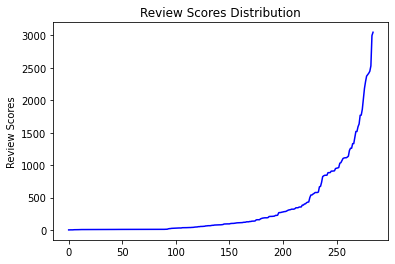

In [159]:
plt.plot(sorted([float(x) for x in REVIEW_SCORES if x]), color="blue")
plt.title("Review Scores Distribution")
plt.ylabel('Review Scores')
plt.show()

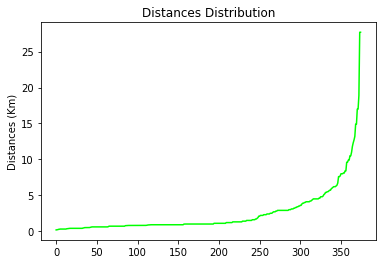

In [161]:
plt.plot(sorted([float(x) for x in DISTANCES if x]), color="lime")
plt.title("Distances Distribution")
plt.ylabel('Distances (Km)')
plt.show()

Text(0.5, 1.0, 'Hotel Ratings Distribution')

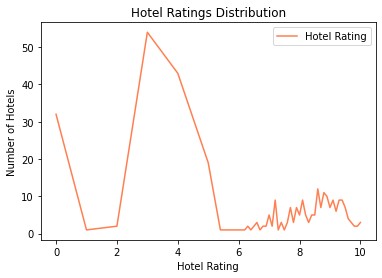

In [168]:
file_name = "Hotels.csv"
file_name_output = "Hotels_.csv"

df = pd.read_csv(file_name, sep=",")
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False) 

df = pd.read_csv(file_name_output, sep=",")

df.groupby(['Hotel Rating'])['Hotel Rating'].count().plot(legend=True, color='coral')
plt.ylabel('Number of Hotels')
plt.title('Hotel Ratings Distribution')

Text(0.5, 1.0, 'The Number of each Scores')

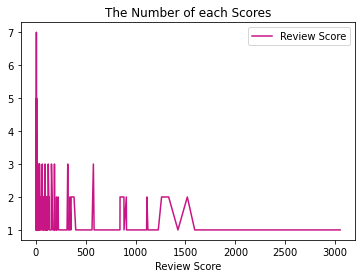

In [174]:
df.groupby(['Review Score'])['Review Score'].count().plot(legend=True, color='mediumvioletred')
plt.title('The Number of each Scores')

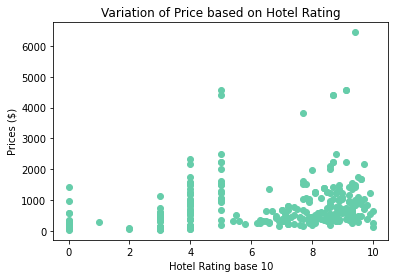

In [194]:
# Visualize The variation of the price according to the rating
x = df['Hotel Rating']
y = df['Price ($)']

plt.scatter(x, y, color='mediumaquamarine')
plt.xlabel('Hotel Rating base 10')
plt.ylabel('Prices ($)')
plt.title('Variation of Price based on Hotel Rating')
plt.show()

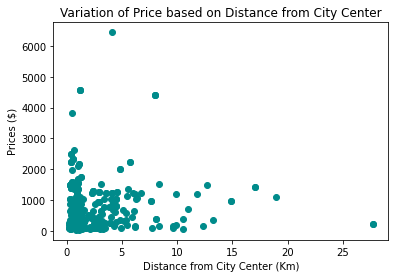

In [192]:
# Visualize The variation of the price according to the distance
x = DISTANCES
y = df['Price ($)']

plt.scatter(x, y, color='darkcyan')
plt.xlabel('Distance from City Center (Km)')
plt.ylabel('Prices ($)')
plt.title('Variation of Price based on Distance from City Center')
plt.show()

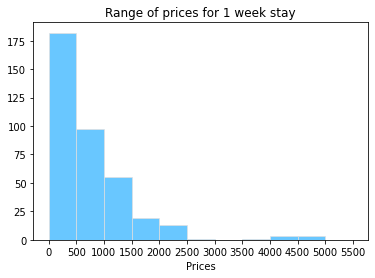

In [208]:
# Price Ranges Visualization
bins= [0, 500, 1000, 1500 , 2000, 2500, 3000, 3500 , 4000, 4500, 5000, 5500]
plt.hist(df['Price ($)'], bins=bins, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=1, alpha=0.7)
plt.xticks(bins)
plt.xlabel("Prices")
plt.title('Range of prices for 1 week stay')
plt.show()

**Step 4 – Interaction with the user**

                  Welcome to Marrackech Hotels
This platform is meant to give you the best selection of accomodation
                   all based on YOUR needs!

What is the minimum price you want to pay for the entire stay? 100
What is the maximum price you want to pay for the entire stay? 2500
What is the maximum distance (Km) of the hotel from the city center? 5
What is the minimum review score you want for the hotel? 10
What is the minimum rating you want for the hotel? 2

          You want a hotel that has a price range of [100, 2500] dollars,
             for its review score to be at least [10 reviews,
                     for its rating to be at least [2,
          and for it to be less than 5 Kms away from city center.

Based on which criteria do you want your list to be sorted? 
1- Distance from City Center             2- Price                3- Review Score

Enter a number from 1-3: 1

Name: Hotel Jadali & Spa
Price ($): 1488
Distance from City Center: 0.3
Review Score: 210

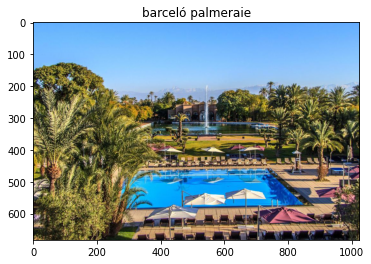

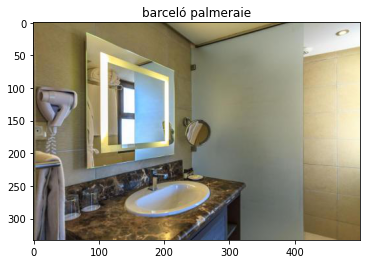

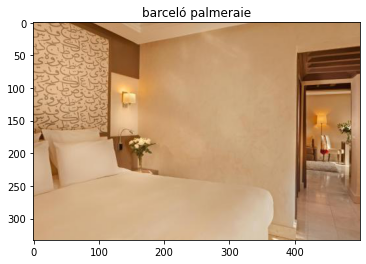

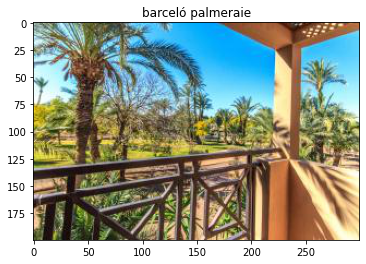

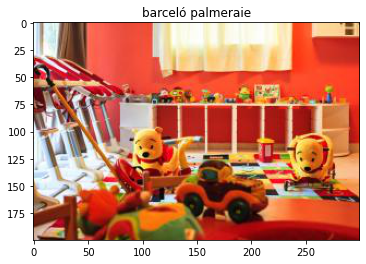

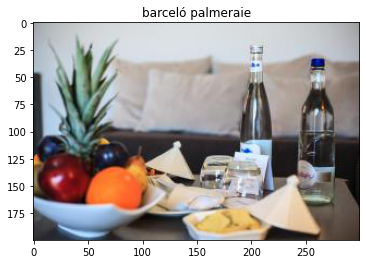

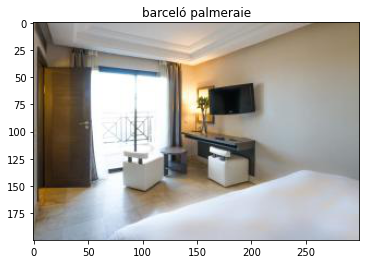

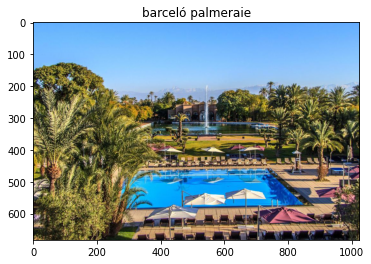

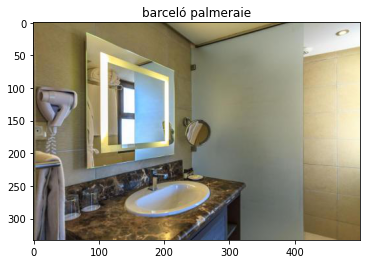

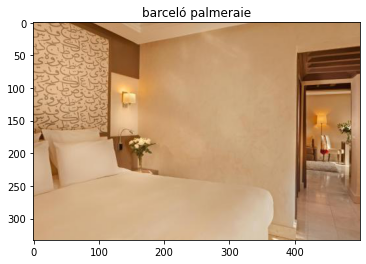

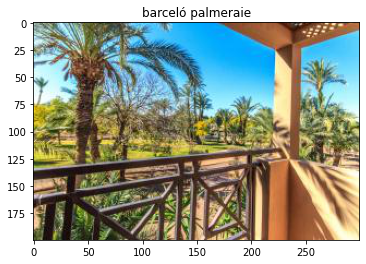

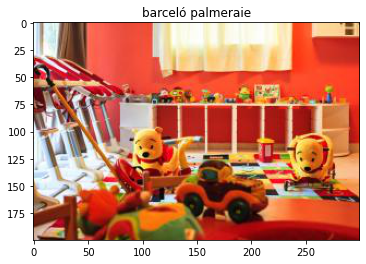

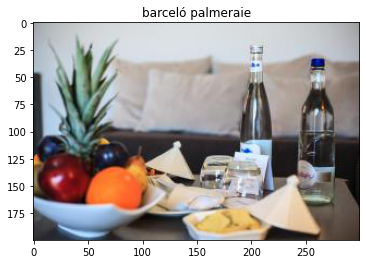

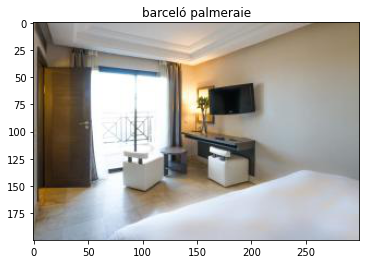

In [180]:
# Get user promts
print('                  Welcome to Marrackech Hotels')
print('This platform is meant to give you the best selection of accomodation')
print('                   all based on YOUR needs!')
print()
min = input('What is the minimum price you want to pay for the entire stay? ')
max = input('What is the maximum price you want to pay for the entire stay? ')
dist = input('What is the maximum distance (Km) of the hotel from the city center? ')
min_rs = input('What is the minimum review score you want for the hotel? ')
min_hr = input('What is the minimum rating you want for the hotel? ')


print()
print('          You want a hotel that has a price range of [' + str(min) + ', ' + str(max) + '] dollars,')
print('             for its review score to be at least [' + str(min_rs) + ' reviews,')
print('                     for its rating to be at least [' + str(min_hr) + ',')
print('          and for it to be less than ' + str(dist) + ' Kms away from city center.')
print()
print('Based on which criteria do you want your list to be sorted? ')
print('1- Distance from City Center             2- Price                3- Review Score')
print()
criteria = input('Enter a number from 1-3: ')
print()

#read csv, and split on "," the line
csv_file = csv.reader(open('Hotels.csv', "r"), delimiter=",")

hotels = []
for row in csv_file:
  if row[2] >= min and row[2] <= max and row[1] <= dist and row[3] >= min_rs and float(row[4]) >= float(min_hr):
      hotels.append(row)
  
sorted_hotels = sorted(hotels, key = itemgetter(int(criteria)))

for i in range(len(sorted_hotels)):
  print(f"Name: {sorted_hotels[i][0]}")
  print(f"Price ($): {sorted_hotels[i][2]}")
  print(f"Distance from City Center: {sorted_hotels[i][1]}")
  print(f"Review Score: {sorted_hotels[i][3]}")
  print(f"Hotel Rating: {sorted_hotels[i][4]}\n\n")

print() 
hotel = input('Input the name of your final decision to get all the information about the hotel you selected: ')
hotel = hotel.lower()

for h in range(len(sorted_hotels)):
  if(hotel == sorted_hotels[h][0].lower()):
    
    print(f"Name: {sorted_hotels[h][0]}")
    print(f"Price ($): {sorted_hotels[h][2]}")
    print(f"Distance from City Center: {sorted_hotels[h][1]}")
    print(f"Review Score: {sorted_hotels[h][3]}")
    print(f"Hotel Rating: {sorted_hotels[h][4]}")
    print(f"Address: {sorted_hotels[h][8]}")
    print(f"Summary: {sorted_hotels[h][7]}")

    # Adjusting image links to be itterable
    img = sorted_hotels[h][9].replace('[','')
    img = img.replace(']','')
    img = img.replace('\'','')
    
    links = []
    links= img.split(',')
    
    for link in links: 
      response = requests.get(link)
      img = Image.open(BytesIO(response.content))
      plt.figure()
      plt.title(hotel)
      plt.imshow(img)

